# 準備

In [1]:
!pip install fastf1

In [2]:
import numpy as np
import fastf1
import fastf1.plotting
from matplotlib import pyplot as plt

fastf1.Cache.enable_cache('fastf1/cache')
fastf1.plotting.setup_mpl()

## fastf1からデータを取得
2022年のMonzaのレースデータを使ってみる

In [3]:
session = fastf1.get_session(2022, 'Monza', 'R')
session.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '47', '20', '77', '31', '11', '18', '5', '6', '24', '45', '1', '14', '10', '3', '4', '63', '44', '22']


In [4]:
# ルクレールのレースペースデータを取得
lec_laps = session.laps.pick_driver('LEC')
lec_laps['LapTimeSec'] = lec_laps['LapTime'].apply(lambda x: x.seconds + x.microseconds / 1000000)
compounds = {}
for i, compound in enumerate(np.unique(lec_laps['Compound'].values)):
    compounds[compound] = i
lec_laps['CompoundSeq'] = lec_laps['Compound'].apply(lambda x: compounds[x])
lec_laps

/tmp/ipykernel_145/374787671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lec_laps['LapTimeSec'] = lec_laps['LapTime'].apply(lambda x: x.seconds + x.microseconds / 1000000)
/tmp/ipykernel_145/374787671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lec_laps['CompoundSeq'] = lec_laps['Compound'].apply(lambda x: compounds[x])


,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTimeSec,CompoundSeq
0,0 days 01:03:56.501000,16,NaT,1,0 days 00:24:32.238000,NaT,NaT,0 days 00:00:29.537000,0 days 00:00:28.715000,NaT,...,True,1,0 days 01:02:28.137000,Ferrari,LEC,1,False,2022-09-11 13:03:28.378,NaN,1
1,0 days 01:05:23.036000,16,0 days 00:01:26.535000,2,NaT,NaT,0 days 00:00:28.687000,0 days 00:00:29.260000,0 days 00:00:28.588000,0 days 01:04:25.188000,...,True,1,0 days 01:03:56.501000,Ferrari,LEC,1,True,2022-09-11 13:04:56.742,86.535,1
2,0 days 01:06:49.388000,16,0 days 00:01:26.352000,3,NaT,NaT,0 days 00:00:28.359000,0 days 00:00:29.434000,0 days 00:00:28.559000,0 days 01:05:51.395000,...,True,1,0 days 01:05:23.036000,Ferrari,LEC,1,True,2022-09-11 13:06:23.277,86.352,1
3,0 days 01:08:15.190000,16,0 days 00:01:25.802000,4,NaT,NaT,0 days 00:00:28.202000,0 days 00:00:29.144000,0 days 00:00:28.456000,0 days 01:07:17.590000,...,True,1,0 days 01:06:49.388000,Ferrari,LEC,1,True,2022-09-11 13:07:49.629,85.802,1
4,0 days 01:09:41.092000,16,0 days 00:01:25.902000,5,NaT,NaT,0 days 00:00:28.140000,0 days 00:00:29.351000,0 days 00:00:28.411000,0 days 01:08:43.330000,...,True,1,0 days 01:08:15.190000,Ferrari,LEC,1,True,2022-09-11 13:09:15.431,85.902,1
5,0 days 01:11:06.651000,16,0 days 00:01:25.559000,6,NaT,NaT,0 days 00:00:28.042000,0 days 00:00:29.215000,0 days 00:00:28.302000,0 days 01:10:09.134000,...,True,1,0 days 01:09:41.092000,Ferrari,LEC,1,True,2022-09-11 13:10:41.333,85.559,1
6,0 days 01:12:32.118000,16,0 days 00:01:25.467000,7,NaT,NaT,0 days 00:00:27.946000,0 days 00:00:29.207000,0 days 00:00:28.314000,0 days 01:11:34.597000,...,True,1,0 days 01:11:06.651000,Ferrari,LEC,1,True,2022-09-11 13:12:06.892,85.467,1
7,0 days 01:13:57.902000,16,0 days 00:01:25.784000,8,NaT,NaT,0 days 00:00:28.018000,0 days 00:00:29.412000,0 days 00:00:28.354000,0 days 01:13:00.136000,...,True,1,0 days 01:12:32.118000,Ferrari,LEC,1,True,2022-09-11 13:13:32.359,85.784,1
8,0 days 01:15:23.994000,16,0 days 00:01:26.092000,9,NaT,NaT,0 days 00:00:28.075000,0 days 00:00:29.516000,0 days 00:00:28.501000,0 days 01:14:25.977000,...,True,1,0 days 01:13:57.902000,Ferrari,LEC,1,True,2022-09-11 13:14:58.143,86.092,1
9,0 days 01:16:50.260000,16,0 days 00:01:26.266000,10,NaT,NaT,0 days 00:00:28.171000,0 days 00:00:29.509000,0 days 00:00:28.586000,0 days 01:15:52.165000,...,True,1,0 days 01:15:23.994000,Ferrari,LEC,1,True,2022-09-11 13:16:24.235,86.266,1


### 可視化

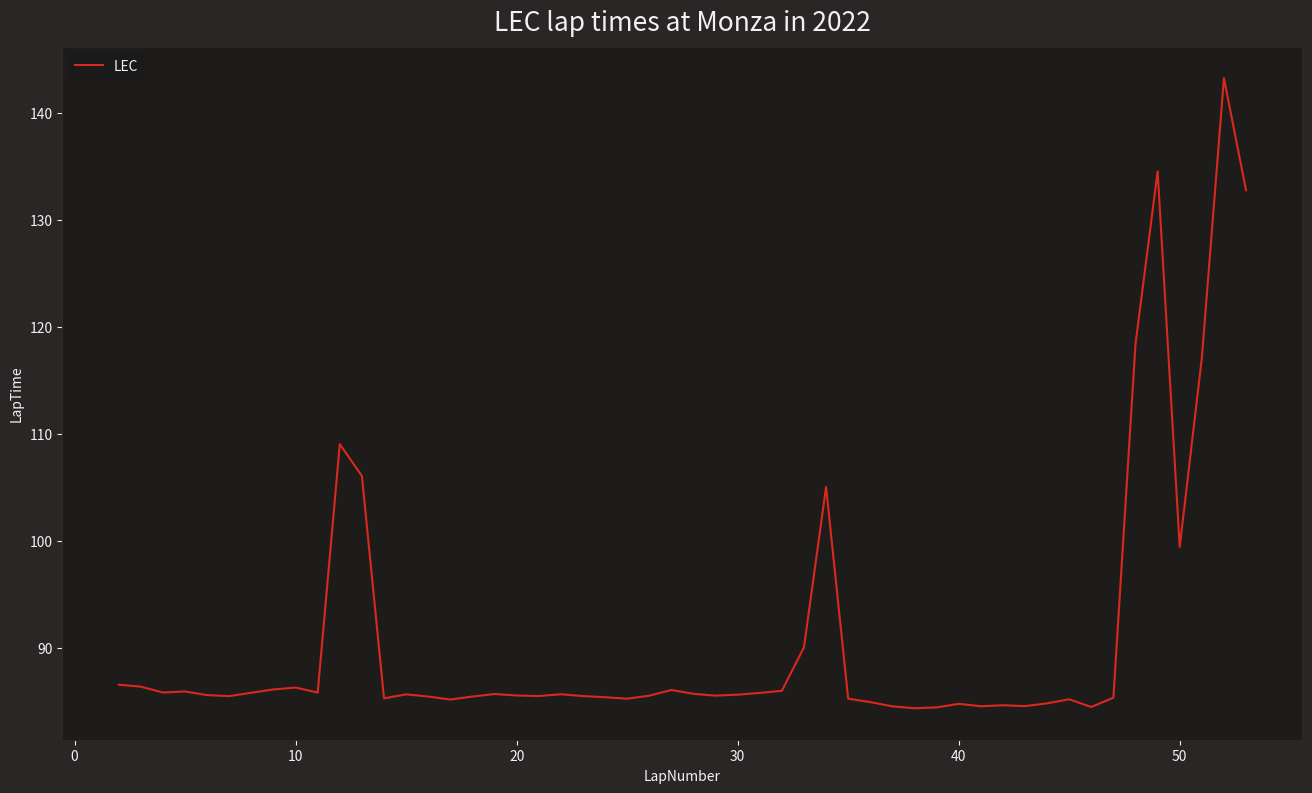

In [5]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.plot(lec_laps['LapNumber'], lec_laps['LapTimeSec'], label='LEC', color='#da291c')
ax.set_xlabel('LapNumber')
ax.set_ylabel('LapTime')
ax.set_title('LEC lap times at Monza in 2022')
ax.legend()
plt.show()

12, 33周目付近のタイムが上がっているのはピットストップによるもの。47周目付近から最後にかけてタイムが上がっているのは、イエローフラッグ、セーフティーカーの導入によるものです。

ピットストップ、イエローフラッグ、セーフティーカーなどのないクリアラップだけを抜き出して可視化してみます。

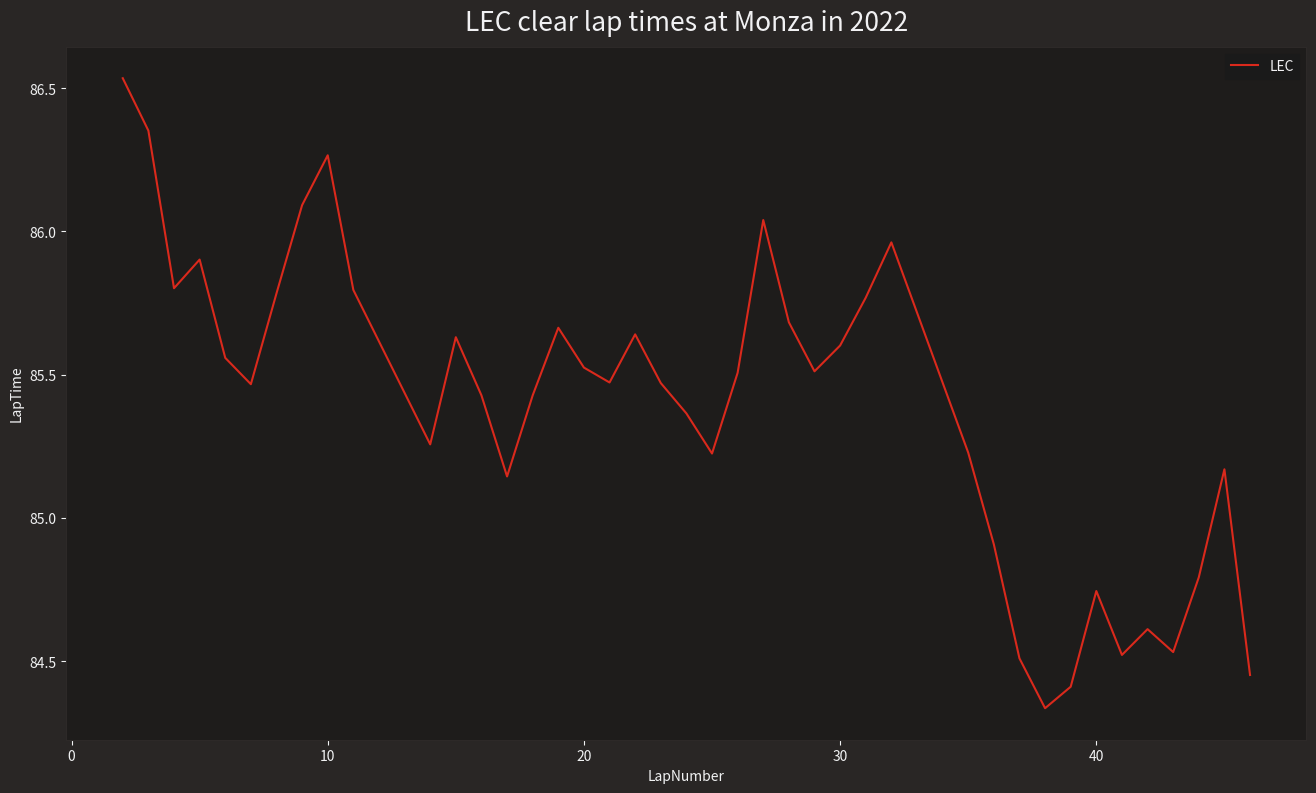

In [6]:
lec_clear_laps = lec_laps.query('TrackStatus == "1" and PitOutTime == "NaT" and PitInTime == "NaT"')

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.plot(lec_clear_laps['LapNumber'], lec_clear_laps['LapTimeSec'], label='LEC', color='#da291c')
ax.set_xlabel('LapNumber')
ax.set_ylabel('LapTime')
ax.set_title('LEC clear lap times at Monza in 2022')
ax.legend()
plt.show()

仮にピットストップが不要で、イエローフラッグ、セーフティーカーなどの要因がなかった場合、各ラップどのくらいのタイムで走れた可能性があるのかを回帰を使って予測してみます。

# 単回帰分析
単回帰分析は一つの変数を使って、目的変数を予測します。  
ここでは、周回数を使ってラップタイムを予測してみます。

In [7]:
x_train = lec_clear_laps['LapNumber']
x_mean = x_train.mean()

y_train = lec_clear_laps['LapTimeSec']
y_mean = y_train.mean()

In [8]:
# 回帰係数を求める
a = ((x_train - x_mean) * (y_train - y_mean)).sum() / ((x_train - x_mean) * (x_train - x_mean)).sum()
a

-0.03264720985496163

In [10]:
x_test = lec_laps['LapNumber'].values
predicted_y = a * (x_test - x_mean) + y_mean
predicted_y

array([86.14680263, 86.11415542, 86.08150821, 86.048861  , 86.01621379,
       85.98356658, 85.95091937, 85.91827216, 85.88562495, 85.85297774,
       85.82033053, 85.78768332, 85.75503611, 85.7223889 , 85.68974169,
       85.65709448, 85.62444727, 85.59180006, 85.55915285, 85.52650564,
       85.49385843, 85.46121122, 85.42856401, 85.3959168 , 85.36326959,
       85.33062238, 85.29797517, 85.26532796, 85.23268075, 85.20003354,
       85.16738633, 85.13473912, 85.10209191, 85.0694447 , 85.03679749,
       85.00415028, 84.97150307, 84.93885586, 84.90620865, 84.87356144,
       84.84091423, 84.80826702, 84.77561981, 84.7429726 , 84.71032539,
       84.67767818, 84.64503097, 84.61238376, 84.57973655, 84.54708934,
       84.51444213, 84.48179493, 84.44914772])

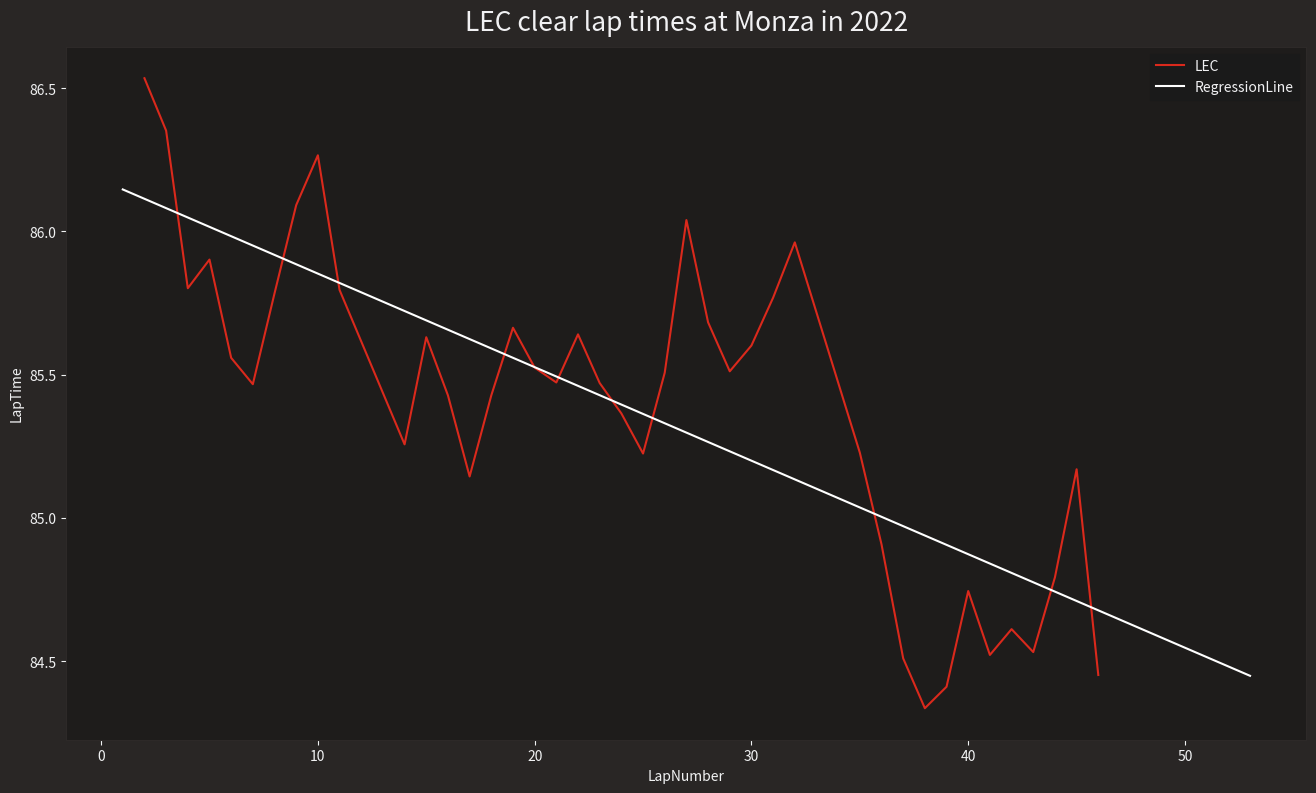

In [11]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.plot(lec_clear_laps['LapNumber'], lec_clear_laps['LapTimeSec'], label='LEC', color='#da291c')
ax.plot(lec_laps['LapNumber'], predicted_y, label='RegressionLine', color='#FFFFFF')
ax.set_xlabel('LapNumber')
ax.set_ylabel('LapTime')
ax.set_title('LEC clear lap times at Monza in 2022')
ax.legend()
plt.show()

赤線は実際のラップタイム。白線は周回数とラップタイムの関係を表した線です。  
右に行くほど下がっている = 周回数を重ねるほどラップタイムが短くなることを表しています。  
これは実際に、周回数を重ねることで車に搭載されている燃料が少なくなり車の重量が軽くなったり、コースの路面にタイヤのラバーがのることでより早く走れる状況になることから感覚と一致しています。

# 重回帰分析
単回帰分析は一つの変数を使って、目的変数を予測しました。  
しかし、実際のF1では他のさまざまな要因でラップタイムが変わってきます。 　
今回は周回数の他、履いているタイヤの種類とそのタイヤを使った周回数を元にラップタイムを予測してみます。

## スケーリング
このままの値でも予測が可能ですが、今回はどの変数（周回数、タイヤの種類、タイヤを使った周回数）がどのくらいラップタイムの良し悪しに影響するのかを知るために、各変数のスケールを揃えておきます。

In [12]:
x_train = lec_clear_laps[['LapNumber', 'TyreLife', 'CompoundSeq']]
scaled_x_train = np.insert(((x_train - x_train.mean()) / x_train.std()).values, 3, 1, axis=1)
scaled_x_train

array([[-1.65354293, -1.40369055,  0.91791724,  1.        ],
       [-1.57871373, -1.19960788,  0.91791724,  1.        ],
       [-1.50388452, -0.99552522,  0.91791724,  1.        ],
       [-1.42905532, -0.79144255,  0.91791724,  1.        ],
       [-1.35422611, -0.58735988,  0.91791724,  1.        ],
       [-1.27939691, -0.38327721,  0.91791724,  1.        ],
       [-1.2045677 , -0.17919454,  0.91791724,  1.        ],
       [-1.12973849,  0.02488813,  0.91791724,  1.        ],
       [-1.05490929,  0.2289708 ,  0.91791724,  1.        ],
       [-0.98008008,  0.43305347,  0.91791724,  1.        ],
       [-0.75559247, -1.40369055, -1.06285154,  1.        ],
       [-0.68076326, -1.19960788, -1.06285154,  1.        ],
       [-0.60593406, -0.99552522, -1.06285154,  1.        ],
       [-0.53110485, -0.79144255, -1.06285154,  1.        ],
       [-0.45627564, -0.58735988, -1.06285154,  1.        ],
       [-0.38144644, -0.38327721, -1.06285154,  1.        ],
       [-0.30661723, -0.

In [13]:
y_train

1     86.535
2     86.352
3     85.802
4     85.902
5     85.559
6     85.467
7     85.784
8     86.092
9     86.266
10    85.796
13    85.257
14    85.631
15    85.428
16    85.145
17    85.428
18    85.664
19    85.525
20    85.473
21    85.641
22    85.471
23    85.365
24    85.225
25    85.507
26    86.040
27    85.683
28    85.512
29    85.602
30    85.769
31    85.962
34    85.228
35    84.908
36    84.510
37    84.336
38    84.411
39    84.745
40    84.522
41    84.612
42    84.532
43    84.793
44    85.170
45    84.452
Name: LapTimeSec, dtype: float64

In [14]:
w = np.dot(np.linalg.inv(np.dot(scaled_x_train.T, scaled_x_train)), np.dot(scaled_x_train.T, y_train))
w

array([-5.18753305e-01,  2.41202200e-01, -3.56473222e-03,  8.53927317e+01])

In [15]:
x_test = lec_laps[['LapNumber', 'TyreLife', 'CompoundSeq']]
scaled_x_test = np.insert(((x_test - x_train.mean()) / x_train.std()).values, 3, 1, axis=1)

predicted_y = np.dot(scaled_x_test, w)
predicted_y

array([85.8982599 , 85.90866719, 85.91907448, 85.92948177, 85.93988906,
       85.95029635, 85.96070365, 85.97111094, 85.98151823, 85.99192552,
       86.00233281, 86.0127401 , 85.43950604, 85.44991333, 85.46032062,
       85.47072791, 85.4811352 , 85.49154249, 85.50194978, 85.51235707,
       85.52276437, 85.53317166, 85.54357895, 85.55398624, 85.56439353,
       85.57480082, 85.58520811, 85.5956154 , 85.60602269, 85.61642998,
       85.62683728, 85.63724457, 85.64765186, 84.61726928, 84.62767657,
       84.63808386, 84.64849115, 84.65889844, 84.66930573, 84.67971302,
       84.69012031, 84.7005276 , 84.71093489, 84.72134219, 84.73174948,
       84.74215677, 84.75256406, 84.76297135, 84.18267638, 84.19308367,
       84.20349096, 84.21389825, 84.22430554])

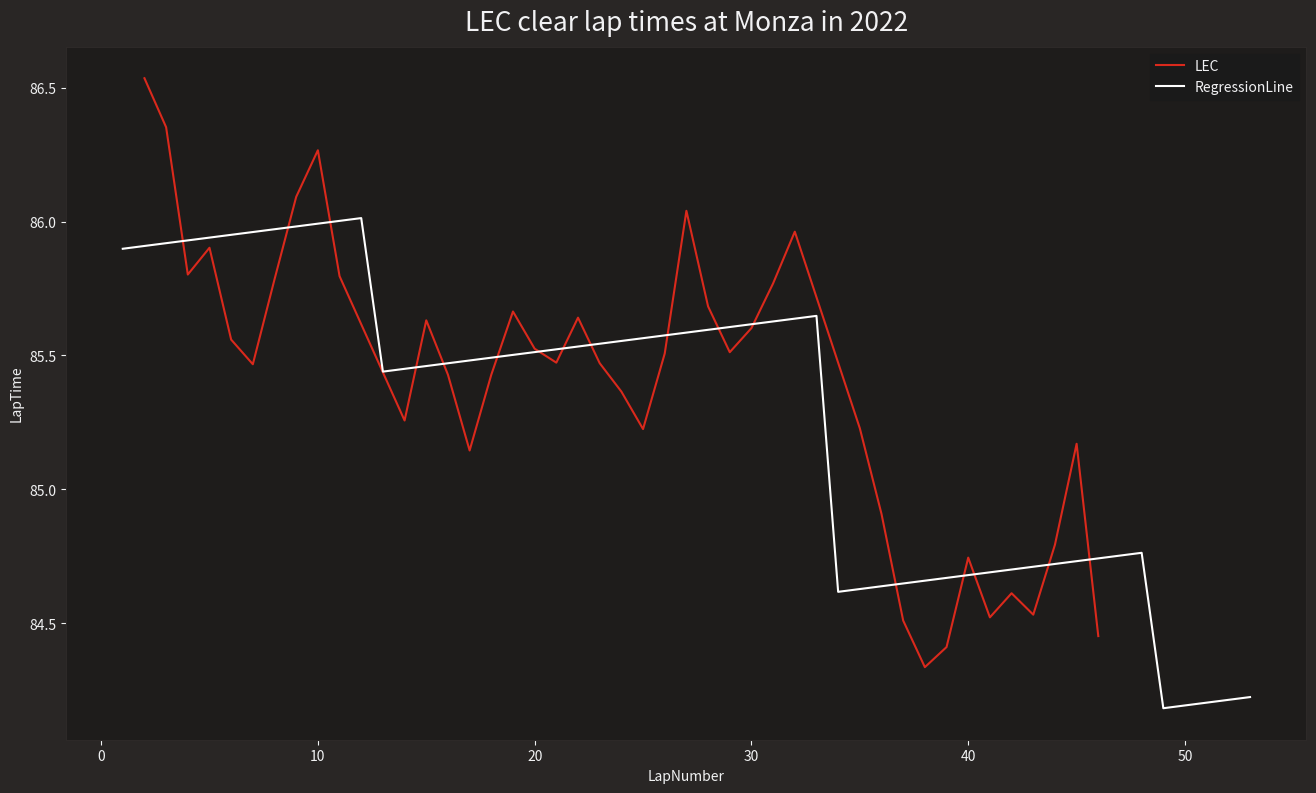

In [16]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.plot(lec_clear_laps['LapNumber'], lec_clear_laps['LapTimeSec'], label='LEC', color='#da291c')
ax.plot(lec_laps['LapNumber'], predicted_y, label='RegressionLine', color='#FFFFFF')
ax.set_xlabel('LapNumber')
ax.set_ylabel('LapTime')
ax.set_title('LEC clear lap times at Monza in 2022')
ax.legend()
plt.show()

赤線は実際のラップタイム。白線は周回数とラップタイムの関係を表した線です。  
タイヤの周回数が増えるにつれてラップタイムは微増し、タイヤを替えタイヤの周回数が0になると一気にラップタイムがよくなる傾向が見えました。  
また、タイヤを12周目付近にSoftからMeduim、さらに33周目付近でMediumからSoftに変更した際には12周目のラップタイムの下がり幅より33周目の下がり幅の方が大きいことがみてとれます。

つまり、こんなことがわかります。
- 全体の周回数を重ねることでラップタイムは良くなる
- タイヤは新しい方がラップタイムはよくなる
- Mediumタイヤよりも、Softタイヤの方がラップタイムは良くなる

ここで重回帰分析のパラメータを見てみましょう。

In [18]:
w

array([-5.18753305e-01,  2.41202200e-01, -3.56473222e-03,  8.53927317e+01])

左から
- 周回数
- タイヤの利用周回数
- タイヤの種類

の係数です。

- 周回数の係数は負の値なので、周回数が伸びるほどラップタイムはさがる
- タイヤの利用周回数の係数は正の値なので、利用周回数が伸びるほどラップタイムは上がる
- タイヤの種類は負の値かつSoft=1, Medium=0なので、Softの方がラップタイムはさがる

さらに周回数の係数の絶対数が一番大きいため、この3つの変数では周回数がラップタイムに与える影響が一番大きいということがわかります。